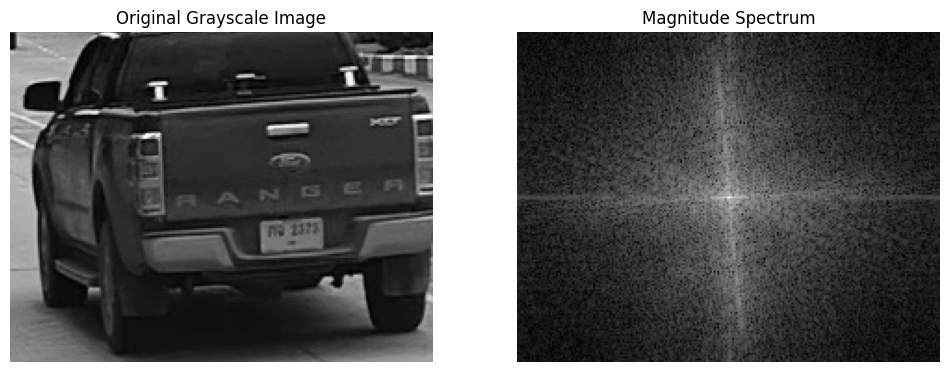

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift
from skimage import io, color

image = io.imread('../../data/vehicle-type-detection/pickup/PIC_8.jpg')  
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)

magnitude_spectrum = np.log(np.abs(dft_shifted) + 1) 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()


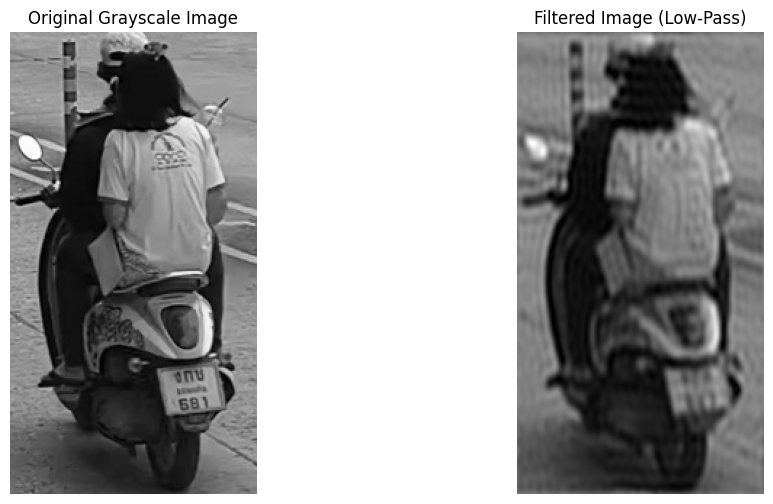

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image = io.imread('../../data/vehicle-type-detection/motorcycle/PIC_12.jpg')
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

# Create a Low-Pass Filter
rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 30  

low_pass_filter = np.zeros((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
low_pass_filter[mask_area] = 1

dft_filtered = dft_shifted * low_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Low-Pass)')
plt.axis('off')

plt.show()


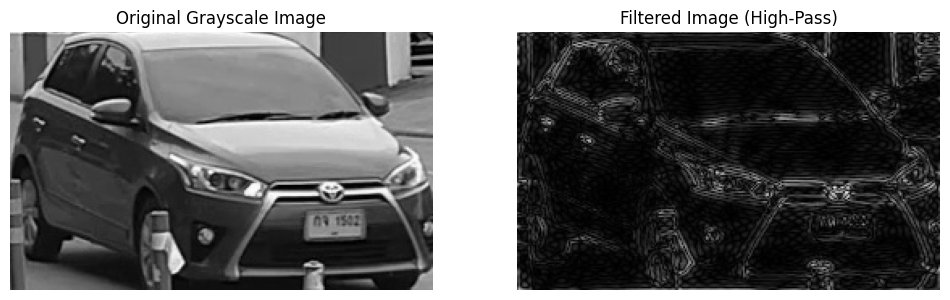

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

image = io.imread('../../data/vehicle-type-detection/hatchback/PIC_23.jpg')
grayscale_image = color.rgb2gray(image)

dft = fft2(grayscale_image)
dft_shifted = fftshift(dft)  

rows, cols = grayscale_image.shape
crow, ccol = rows // 2, cols // 2  
radius = 30  

high_pass_filter = np.ones((rows, cols), np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol)**2 + (y - crow)**2 <= radius**2
high_pass_filter[mask_area] = 0  

dft_filtered = dft_shifted * high_pass_filter

dft_filtered_shifted_back = ifftshift(dft_filtered)
filtered_image = np.abs(ifft2(dft_filtered_shifted_back))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (High-Pass)')
plt.axis('off')

plt.show()


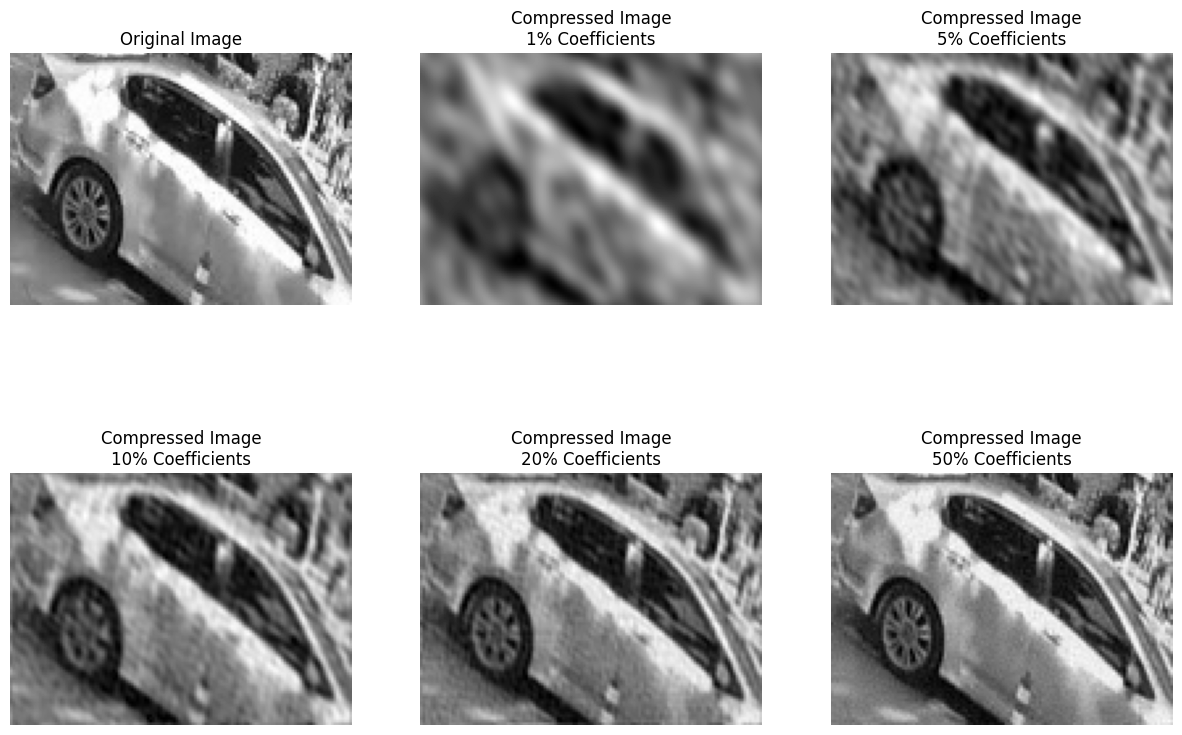

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from skimage import io, color

def compress_image(image, percentage):
    dft = fft2(image)
    dft_shifted = fftshift(dft)  

    flattened_dft = np.abs(dft_shifted).flatten()
    threshold = np.percentile(flattened_dft, 100 - percentage)

    mask = np.abs(dft_shifted) > threshold

    dft_compressed = dft_shifted * mask

    dft_compressed_shifted_back = ifftshift(dft_compressed)
    compressed_image = np.abs(ifft2(dft_compressed_shifted_back))

    return compressed_image

image = io.imread('../../data/vehicle-type-detection/sedan/PIC_23.jpg')
grayscale_image = color.rgb2gray(image)

percentages = [1, 5, 10, 20, 50]

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, percentage in enumerate(percentages):
    compressed_image = compress_image(grayscale_image, percentage)
    
    plt.subplot(2, 3, i + 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compressed Image\n{percentage}% Coefficients')
    plt.axis('off')

plt.show()
